**Скачаем нужные библиотеки:**

    1) matplotlib 
          sudo apt update
          sudo apt install python3-matplotlib
    2) celluloid
          pip install celluloid

**Подключим нужные библиотеки**

In [157]:
import matplotlib.pyplot as plt
import random
from celluloid import Camera
from IPython.display import HTML

In [166]:
class GameLife:

    def __init__(self, x_size=40, y_size=40):
        self.x = x_size
        self.y = y_size
        self.arr = [[0 for i in range(self.y)] for j in range(self.x)]
        self.last_arr = []

    def _is_alive(self, x, y):
        x_down = x - 1
        if x - 1 < 0:
            x_down = self.x - 1
        x_up = x + 1
        if x + 1 >= self.x:
            x_up = 0

        y_left = y - 1
        if y - 1 < 0:
            y_left = self.y - 1
        y_right = y + 1
        if y + 1 >= self.y:
            y_right = 0

        res = self.arr[x_down][y_left] + self.arr[x_down][y] + self.arr[x_down][y_right]
        res += self.arr[x][y_left] + self.arr[x][y_right]
        res += self.arr[x_up][y_left] + self.arr[x_up][y] + self.arr[x_up][y_right]

        if (self.arr[x][y] == 1 and (res == 2 or res == 3)) or (self.arr[x][y] == 0 and res == 3):
            return True
        else:
            return False

    def _is_game_over(self):
        if self.arr == self.last_arr:
            return True
        else:
            self.last_arr = self.arr.copy()
            return False

    def _show(self, name_gif):
        fig, ax = plt.subplots()
        fig.set_figwidth(10)  # ширина и
        fig.set_figheight(10)  # высота "Figure"
        plt.axis('off')
        camera = Camera(fig)

        # сделаем несколько начальных кадров, чтобы пользователь увидел начальную картинку
        for a in range(4):
            ax.pcolormesh(self.arr, edgecolors='grey')
            camera.snap()

        for i in range(130):
            ax.pcolormesh(self.arr, edgecolors='grey')
            camera.snap()
            self._upgrade_iteration_life()

            if self._is_game_over():
                break

        for a in range(4):
            ax.pcolormesh(self.arr, edgecolors='grey')
            camera.snap()

        animation = camera.animate()
#         Чтобы сохранить созданную гифку раскомментируйте строчку ниже
#         animation.save(name_gif, writer='imagemagick')
        return animation

    def _upgrade_iteration_life(self):
        new_arr = [[0 for k in range(self.y)] for g in range(self.x)]
        for i in range(len(new_arr)):
            for j in range(len(new_arr[i])):
                new_arr[i][j] = self._is_alive(i, j)
        self.arr = new_arr.copy()

    def _update_arr(self):
        new_arr = [[0 for k in range(self.y)] for g in range(self.x)]
        self.arr = new_arr.copy()

    def _set_glider(self):
        self.arr[self.x - 2][1] = 1
        self.arr[self.x - 2][3] = 1
        self.arr[self.x - 3][2] = 1
        self.arr[self.x - 3][3] = 1
        self.arr[self.x - 4][2] = 1

    def _set_random_distribution(self):
        number_point = int(self.x * self.y / 100 * 25)
        random.seed()
        for i in range(number_point):
            new_point_x = random.randint(0, self.x - 1)
            new_point_y = random.randint(0, self.y - 1)
            if new_point_x not in range(self.x) and new_point_y not in range(self.y):
                continue
            self.arr[new_point_x][new_point_y] = 1

    def _set_random_gauss(self):
        number_point = int(self.x * self.y / 100 * 15)
        random.seed()
        for i in range(number_point):
            new_point_x = int(random.gauss(self.x / 2, self.x / 6))
            new_point_y = int(random.gauss(self.y / 2, self.y / 6))
            if (new_point_x < 0 or self.x < new_point_x) or (new_point_y < 0 or self.y < new_point_y):
                continue
            self.arr[new_point_x][new_point_y] = 1

    def play_glider(self, name_gif="new_gif.gif"):
        self._update_arr()
        self._set_glider()
        return self._show(name_gif)

    def play_random_distribution(self, name_gif="new_gif.gif"):
        self._update_arr()
        self._set_random_distribution()
        return self._show(name_gif)

    def play_gauss_distribution(self, name_gif="new_gif.gif"):
        self._update_arr()
        self._set_random_gauss()
        return self._show(name_gif)

<IPython.core.display.Javascript object>


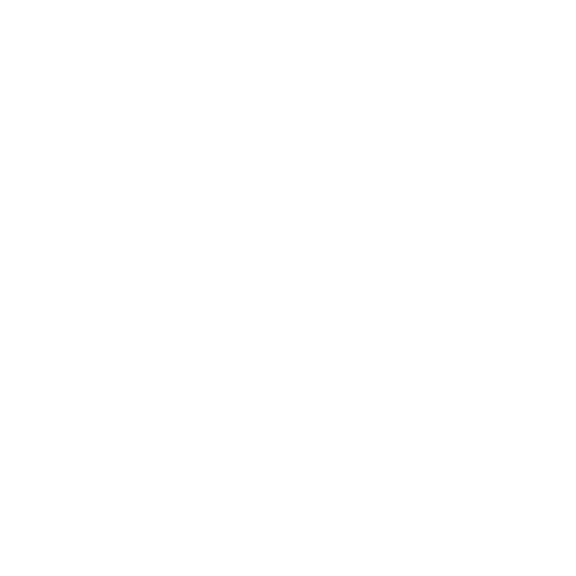

<IPython.core.display.Javascript object>


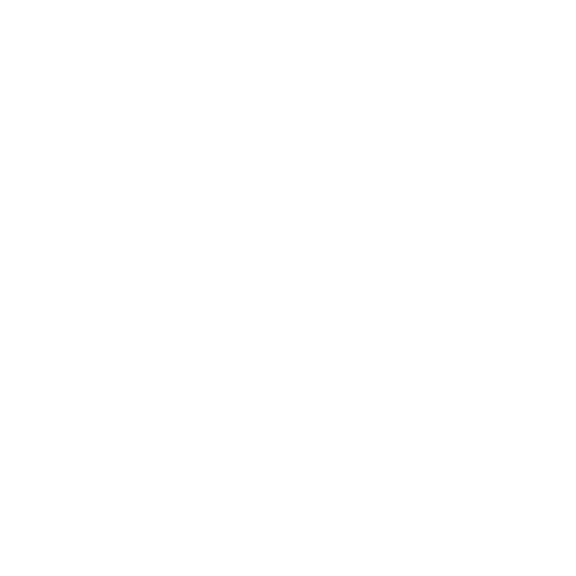

In [167]:
game = GameLife()
# Создадим гифку (поместим в центр страницы, чтобы все точно заметили)
HTML(game.play_glider("glider.gif").to_jshtml())

<IPython.core.display.Javascript object>


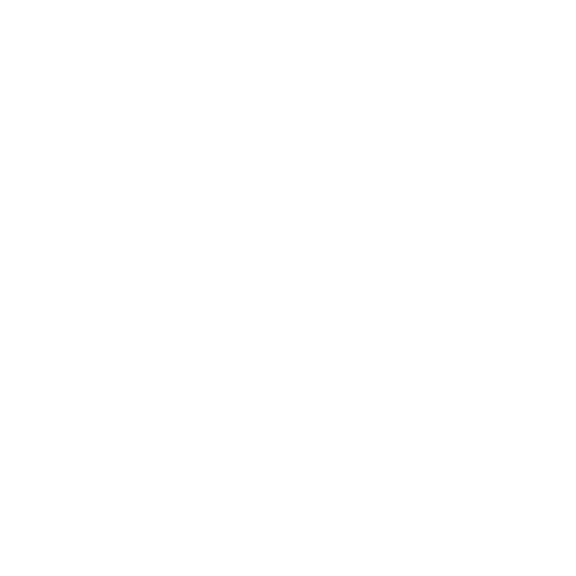

<IPython.core.display.Javascript object>


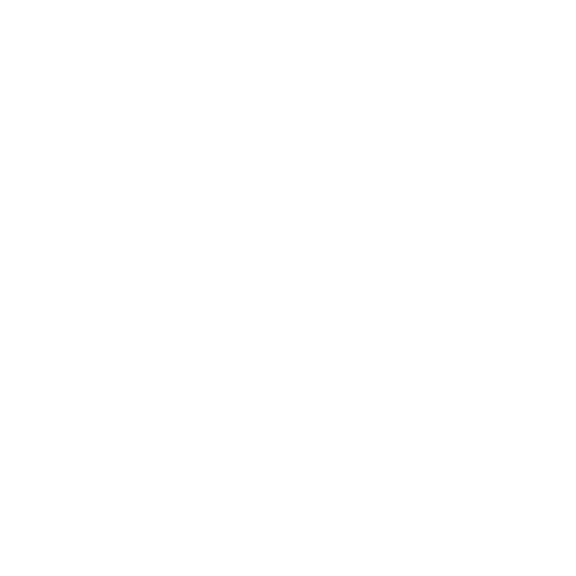

In [168]:
game = GameLife(20, 20)
# Создадим гифку (поместим в центр страницы, чтобы все точно заметили)
HTML(game.play_random_distribution("random_distribution.gif").to_jshtml())

<IPython.core.display.Javascript object>


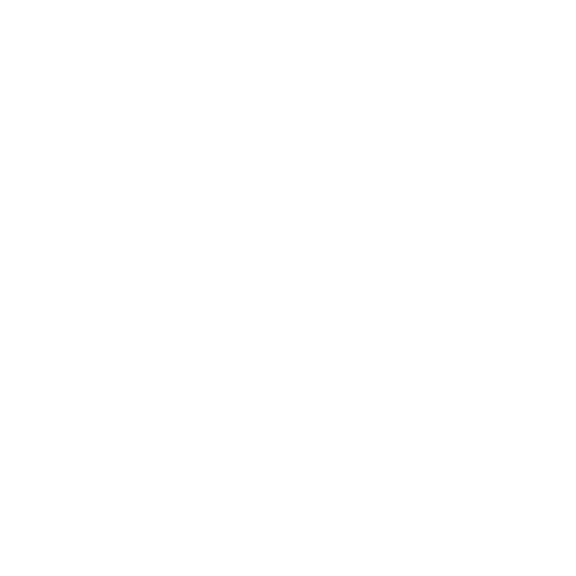

<IPython.core.display.Javascript object>


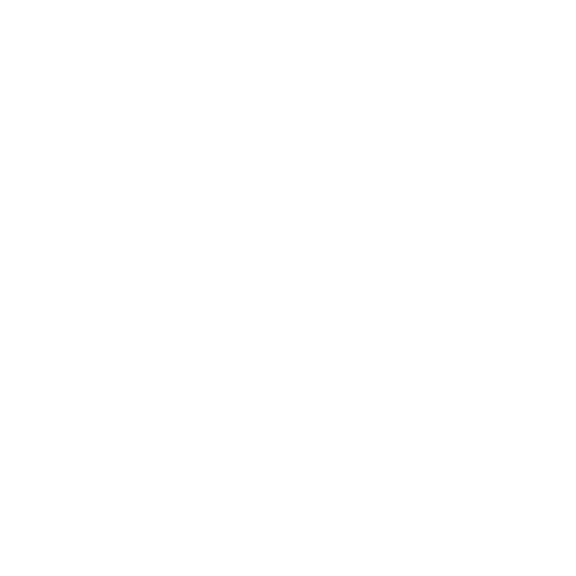

In [171]:
game = GameLife(20, 20)
# Создадим гифку (поместим в центр страницы, чтобы все точно заметили)
HTML(game.play_gauss_distribution("gauss_distribution.gif").to_jshtml())